# Exploratory Data Analysis (EDA)

## Flows:

### 1. DATA PROFILES

### 2. DATA RELATIONSHIPS

### 3. IDENTIFYING AND CREATING FEATURES

###


In [1]:
# First, import the relevant modules and packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#suppress future warnings
#import warnings
#warnings.simplefilter(action='ignore', category=FutureWarning)
#warnings.simplefilter(action='ignore', category=UserWarning)

# Show plots inline
%matplotlib inline

In [2]:
# Import Austin_TX_House_Listings_data_v1.csv & us_income_zipcode.csv
df_with_null = pd.read_csv('../03_processed_data/austin_housePrice_and_income_data.csv', low_memory=False)

In [3]:
df_with_null.shape

(14733, 53)

In [4]:
df_wo_null = df_with_null.dropna()

In [5]:
df_wo_null.shape

(5523, 53)

In [6]:
df = df_with_null.fillna(df_with_null.mean(), inplace=False)
df.shape

(14733, 53)

In [7]:
null_values = df.isnull().sum()
null_values = null_values[null_values > 0]
print(null_values)

Series([], dtype: int64)


In [8]:
df.head()

,zipcode,bathrooms,bedrooms,latitude,livingArea,longitude,propertyTaxRate,resoFactsStats_atAGlanceFacts_1_factValue,resoFactsStats_bathrooms,resoFactsStats_bathroomsFull,...,zpid,latest_price,latest_salemonth,latest_saleyear,numOfAccessibilityFeatures,numOfAppliances,numPriceChanges,lotSize_sqft,price_per_sqft,income_ave
0,78732,5.0,4.0,30.354322,4060.0,-97.911278,1.98,2007.0,5.0,4.0,...,70352485.0,715000.0,2.0,2018.0,0.0,3.0,1.0,15681.6,176.108374,160552.96
1,78732,5.0,5.0,30.355553,4558.0,-97.912544,1.98,2007.0,5.0,5.0,...,70352465.0,1025000.0,8.0,2020.0,0.0,3.0,2.0,28749.6,224.879333,160552.96
2,78732,4.0,4.0,30.352081,4749.0,-97.912048,1.98,2011.0,4.0,3.0,...,70352478.0,825000.0,6.0,2018.0,0.0,1.0,4.0,21344.4,173.720783,160552.96
3,78732,4.0,4.0,30.356226,4867.0,-97.911697,1.98,2009.0,4.0,4.0,...,70352461.0,849000.0,8.0,2019.0,0.0,4.0,7.0,20908.8,174.440107,160552.96
4,78732,4.0,5.0,30.341896,3485.0,-97.907944,1.98,2009.0,4.0,3.0,...,89028960.0,625000.0,7.0,2019.0,0.0,4.0,4.0,7797.0,179.340029,160552.96


In [9]:
df.tail()

,zipcode,bathrooms,bedrooms,latitude,livingArea,longitude,propertyTaxRate,resoFactsStats_atAGlanceFacts_1_factValue,resoFactsStats_bathrooms,resoFactsStats_bathroomsFull,...,zpid,latest_price,latest_salemonth,latest_saleyear,numOfAccessibilityFeatures,numOfAppliances,numPriceChanges,lotSize_sqft,price_per_sqft,income_ave
14728,78749,2.0,3.0,30.224886,1496.0,-97.862335,1.98,1988.0,2.000000,0.0,...,29483690.0,292500.0,1.0,2018.0,0.0,0.0,1.0,5662.0,195.521390,102620.79
14729,78749,2.0,3.0,30.221336,2270.0,-97.879677,1.98,1999.0,2.000000,0.0,...,29484499.0,425000.0,1.0,2018.0,0.0,3.0,1.0,23522.4,187.224670,102620.79
14730,78749,2.0,4.0,30.216406,2645.0,-97.876045,1.98,1993.0,2.000000,0.0,...,29487158.0,424999.0,1.0,2018.0,0.0,3.0,1.0,9321.0,160.680151,102620.79
14731,78749,2.0,3.0,30.213816,1469.0,-97.873711,1.98,1992.0,2.000000,2.0,...,29491564.0,316000.0,1.0,2018.0,0.0,5.0,5.0,10280.0,215.112321,102620.79
14732,78749,2.5,3.0,30.218878,1700.0,-97.864960,1.98,1986.0,2.640274,0.0,...,29486556.0,384900.0,1.0,2018.0,0.0,1.0,1.0,8450.0,226.411765,102620.79


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14733 entries, 0 to 14732
Data columns (total 53 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   zipcode                                    14733 non-null  int64  
 1   bathrooms                                  14733 non-null  float64
 2   bedrooms                                   14733 non-null  float64
 3   latitude                                   14733 non-null  float64
 4   livingArea                                 14733 non-null  float64
 5   longitude                                  14733 non-null  float64
 6   propertyTaxRate                            14733 non-null  float64
 7   resoFactsStats_atAGlanceFacts_1_factValue  14733 non-null  float64
 8   resoFactsStats_bathrooms                   14733 non-null  float64
 9   resoFactsStats_bathroomsFull               14733 non-null  float64
 10  resoFactsStats_bathroo

In [11]:
columns_to_drop = ['zpid', 'latest_salemonth','latitude','longitude']
df = df.drop(columns=columns_to_drop)
df.head()

,zipcode,bathrooms,bedrooms,livingArea,propertyTaxRate,resoFactsStats_atAGlanceFacts_1_factValue,resoFactsStats_bathrooms,resoFactsStats_bathroomsFull,resoFactsStats_bathroomsHalf,resoFactsStats_bathroomsThreeQuarter,...,schools_2_totalCount,yearBuilt,latest_price,latest_saleyear,numOfAccessibilityFeatures,numOfAppliances,numPriceChanges,lotSize_sqft,price_per_sqft,income_ave
0,78732,5.0,4.0,4060.0,1.98,2007.0,5.0,4.0,1.0,0.0,...,1.0,2007.0,715000.0,2018.0,0.0,3.0,1.0,15681.6,176.108374,160552.96
1,78732,5.0,5.0,4558.0,1.98,2007.0,5.0,5.0,0.0,0.0,...,1.0,2007.0,1025000.0,2020.0,0.0,3.0,2.0,28749.6,224.879333,160552.96
2,78732,4.0,4.0,4749.0,1.98,2011.0,4.0,3.0,1.0,0.0,...,1.0,2011.0,825000.0,2018.0,0.0,1.0,4.0,21344.4,173.720783,160552.96
3,78732,4.0,4.0,4867.0,1.98,2009.0,4.0,4.0,0.0,0.0,...,1.0,2009.0,849000.0,2019.0,0.0,4.0,7.0,20908.8,174.440107,160552.96
4,78732,4.0,5.0,3485.0,1.98,2009.0,4.0,3.0,1.0,0.0,...,1.0,2009.0,625000.0,2019.0,0.0,4.0,4.0,7797.0,179.340029,160552.96


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
zipcode,14733.0,78735.851626,1.909263e+01,78617.000000,78727.000000,78739.000000,78749.0000,7.875900e+04
bathrooms,14733.0,2.662282,1.000922e+00,1.000000,2.000000,3.000000,3.0000,2.700000e+01
bedrooms,14733.0,3.427424,8.222666e-01,1.000000,3.000000,3.000000,4.0000,2.000000e+01
livingArea,14733.0,2153.246997,1.098136e+03,1.000000,1460.000000,1926.000000,2595.0000,4.500000e+04
propertyTaxRate,14733.0,1.994037,5.442868e-02,1.980000,1.980000,1.980000,1.9800,2.210000e+00
resoFactsStats_atAGlanceFacts_1_factValue,14733.0,1987.529356,2.763414e+01,0.000000,1973.000000,1992.000000,2005.0000,2.020000e+03
resoFactsStats_bathrooms,14733.0,2.640274,1.026229e+00,0.000000,2.000000,3.000000,3.0000,2.700000e+01
resoFactsStats_bathroomsFull,14733.0,2.039503,1.013720e+00,0.000000,2.000000,2.000000,2.0000,2.600000e+01
resoFactsStats_bathroomsHalf,14733.0,0.373922,5.141931e-01,0.000000,0.000000,0.000000,1.0000,6.000000e+00
resoFactsStats_bathroomsThreeQuarter,14733.0,0.003025,6.046862e-02,0.000000,0.000000,0.000000,0.0000,3.000000e+00


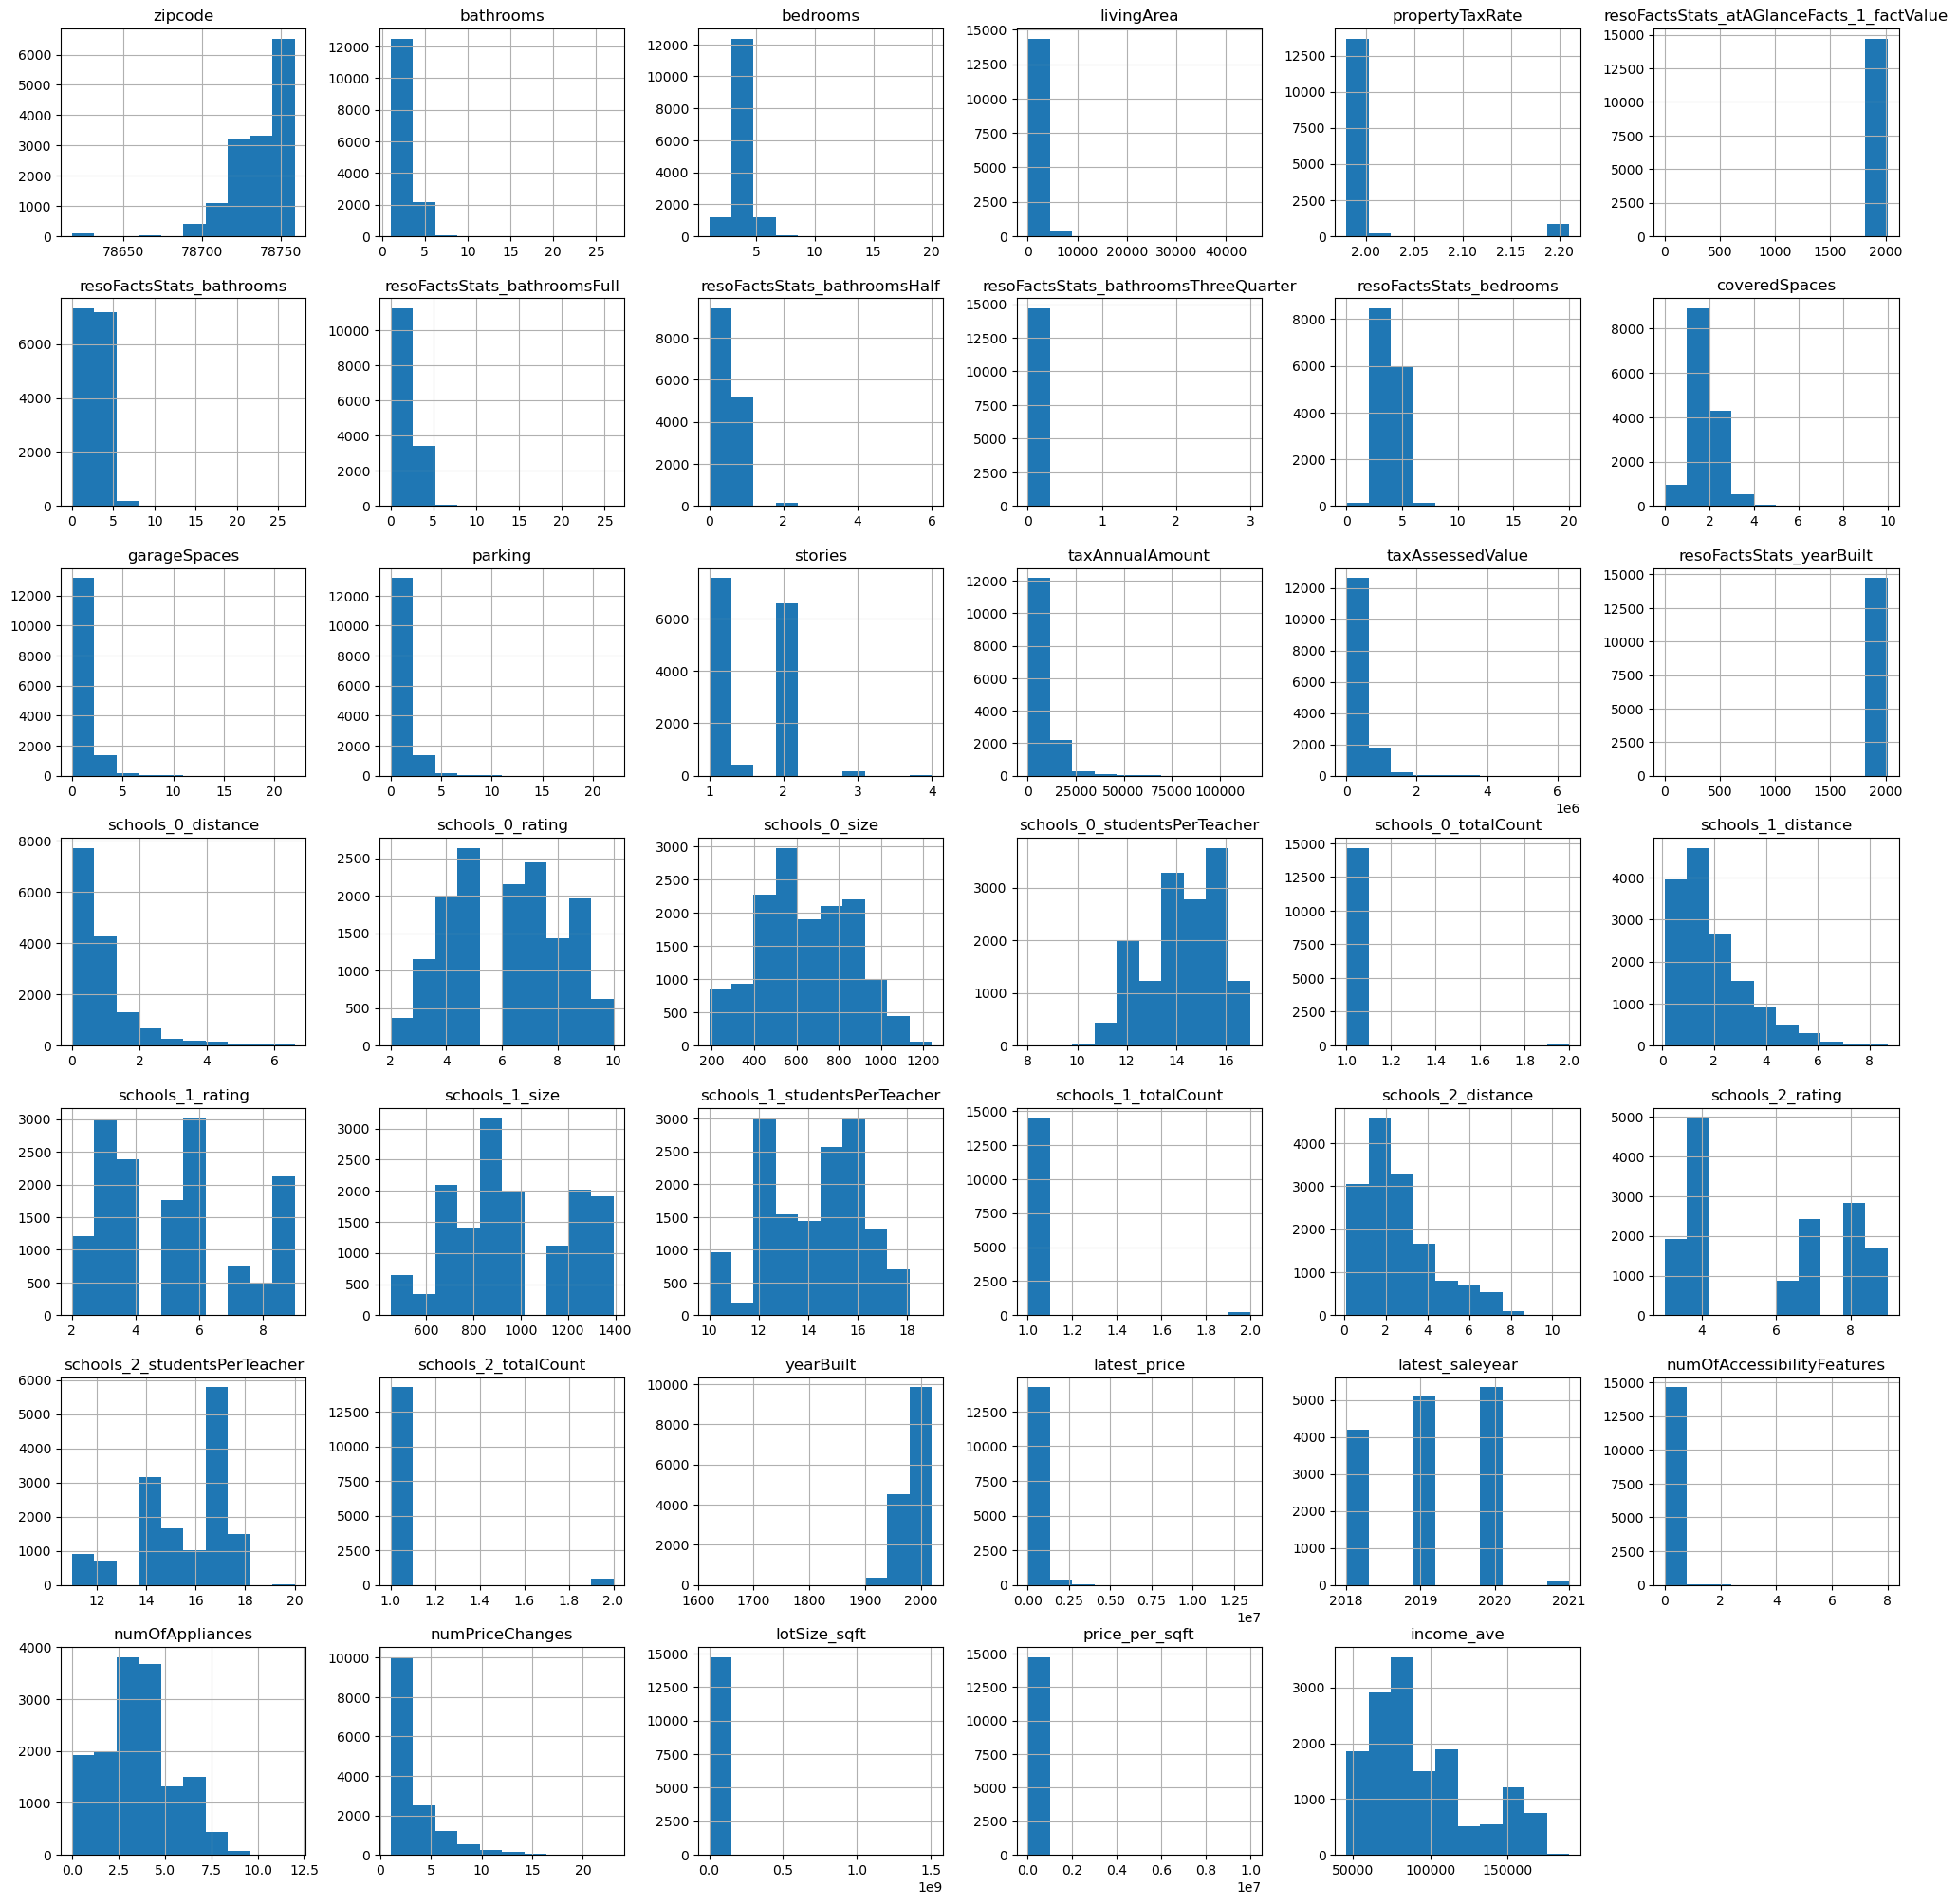

In [13]:
hist = df.hist(bins=10,figsize =(25,25))

In [14]:
df.select_dtypes(include = 'object').count()

Series([], dtype: int64)

In [15]:
#select categorical variables only
#df_cat = df.select_dtypes(include = 'object').copy()
#get counts of each variable value
#df_cat.ColumnName.value_counts()
#count plot for one variable
#sns.countplot(data = df_cat, x = 'ColumnName')

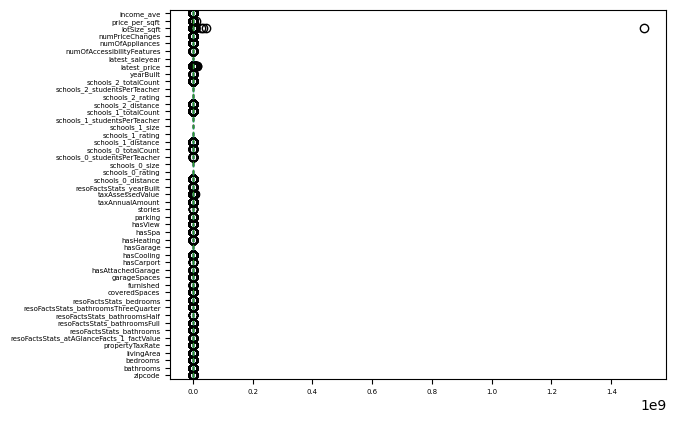

In [16]:
#create a boxplot for every column in df
boxplot = df.boxplot(grid=False, vert=False,fontsize=5)

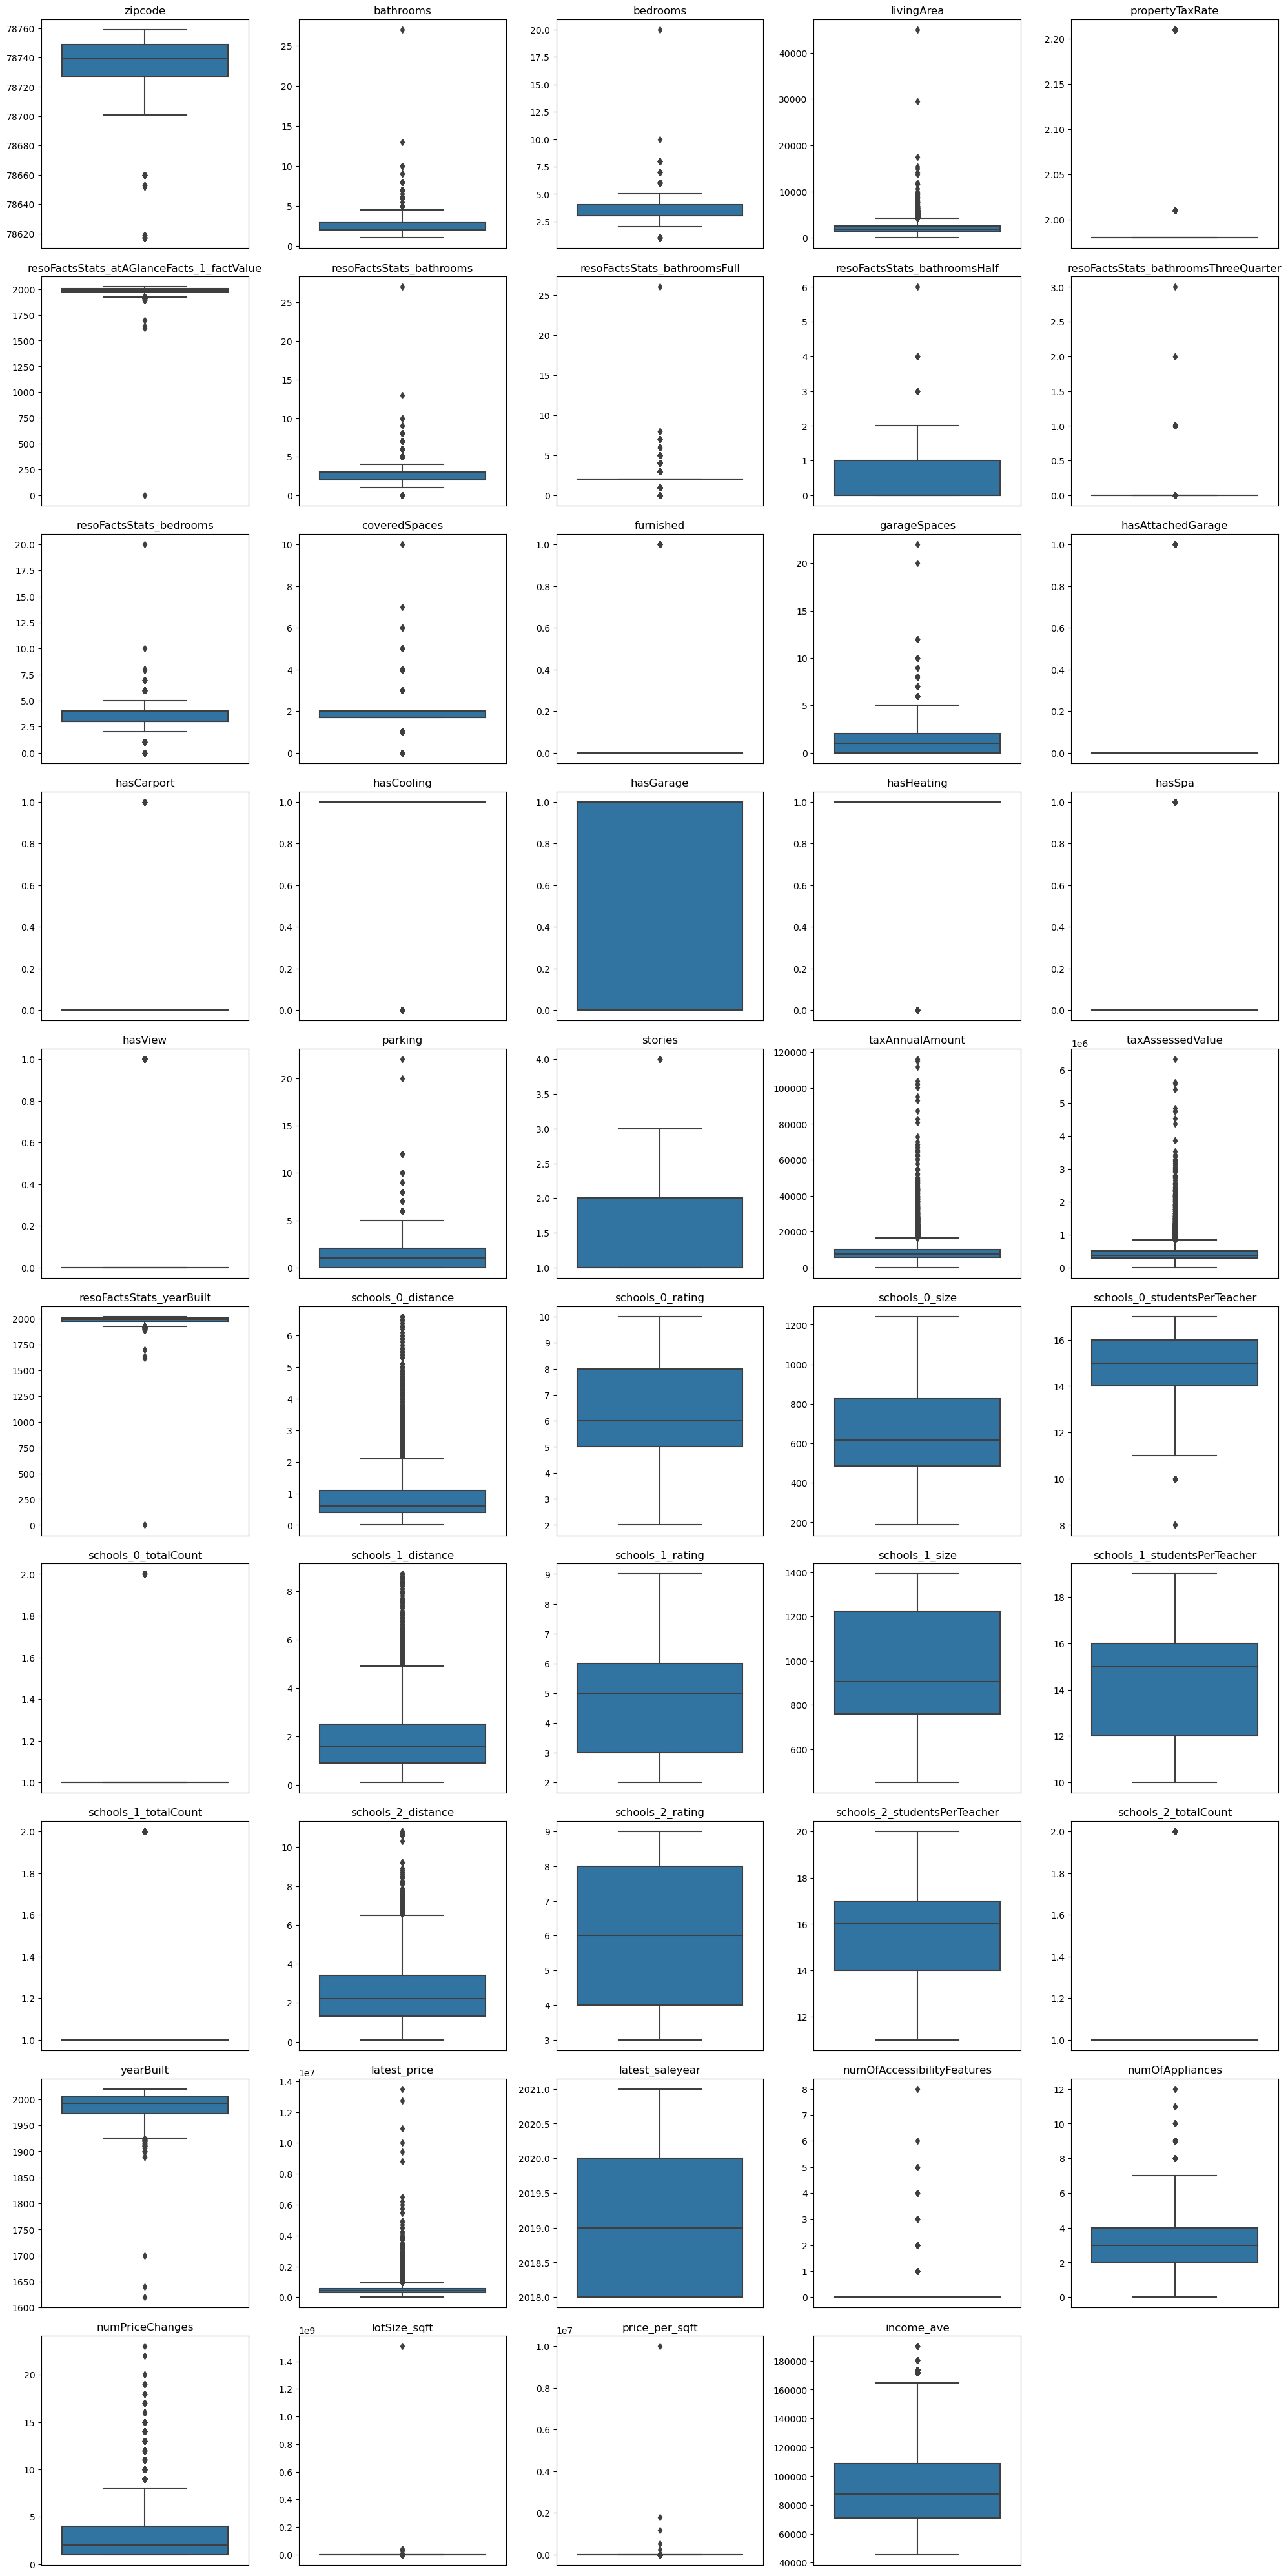

In [17]:
n_cols = 5  # Number of columns of subplots
n_rows = (df.shape[1] + n_cols - 1) // n_cols  # Calculate required rows

plt.figure(figsize=(20, 4 * n_rows))  # Adjust figure size based on number of rows

# Loop through each column in the DataFrame
for i, column in enumerate(df.columns):
    plt.subplot(n_rows, n_cols, i + 1)  # Create subplot for each column
    sns.boxplot(data=df[column])  # Create box plot for the current column
    plt.title(column)  # Set title for the subplot
    plt.xticks([])  # Optionally hide x-ticks

plt.tight_layout()  # Adjust layout for better spacing
plt.show()  # Display the plots

### 2. DATA RELATIONSHIPS

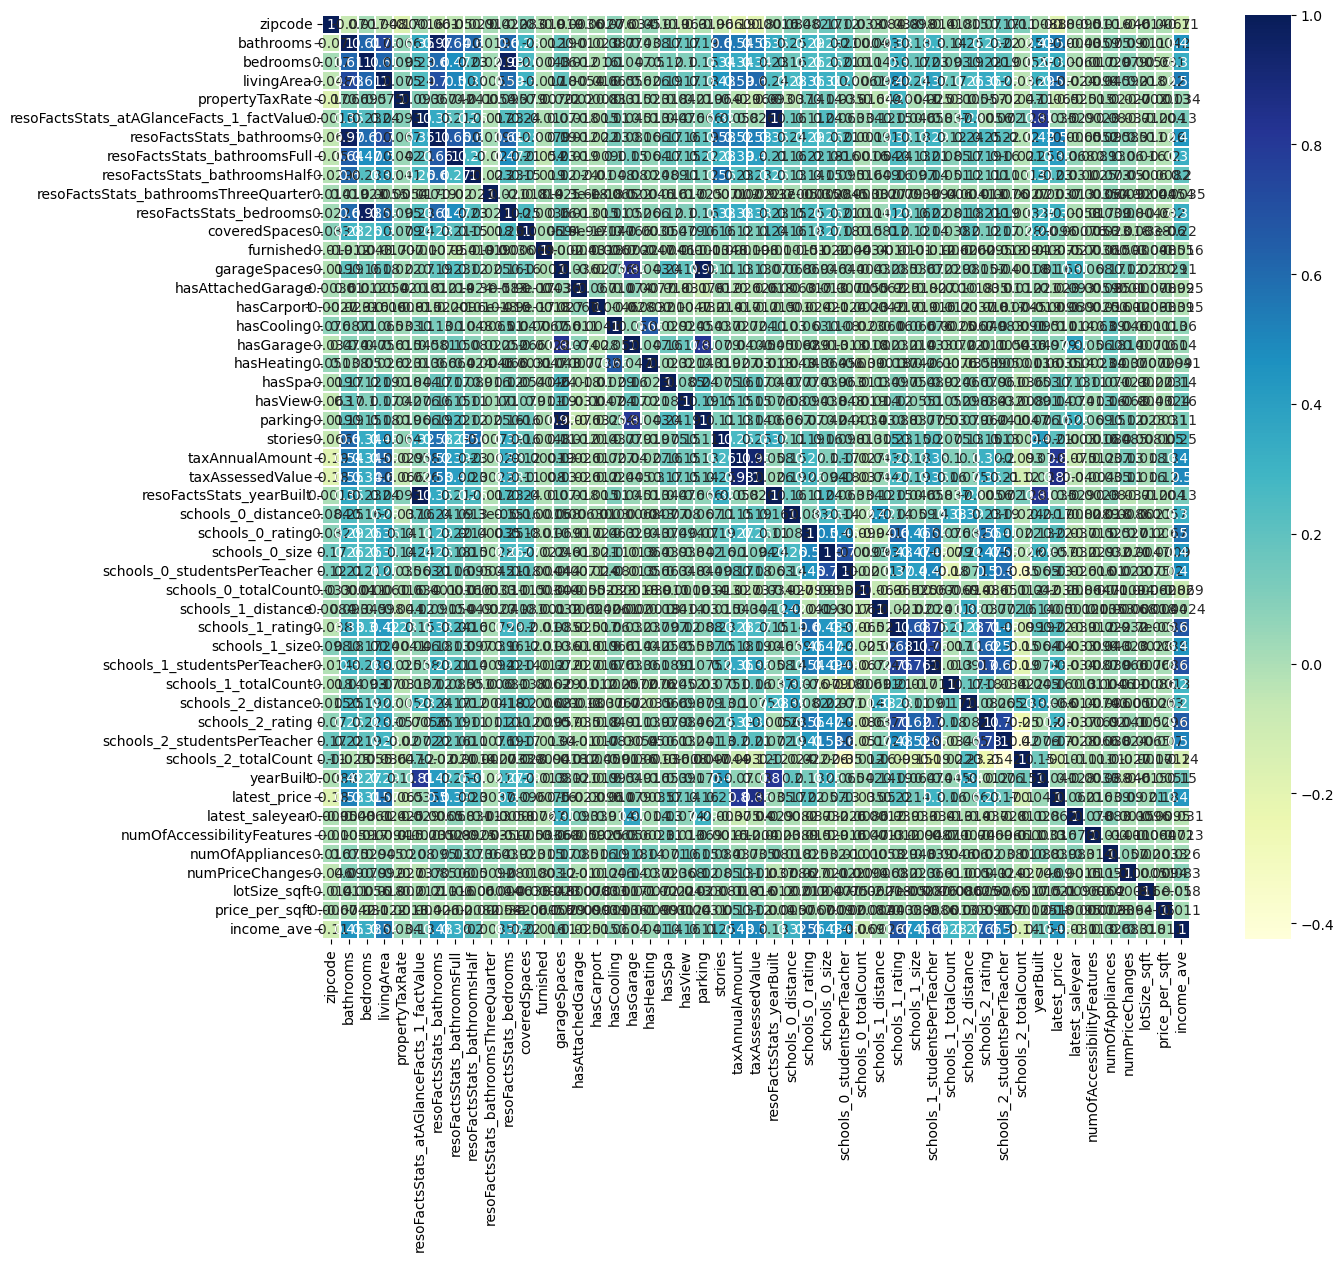

In [18]:
#create the correlation matrix heat map
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

In [19]:
zip_house_price_df = pd.melt(df[['zipcode', 'latest_price']], 
                        id_vars='zipcode', 
                        var_name='price_per_sqft', 
                        value_vars=['zipcode', 'latest_price'], 
                        value_name='latest_price')
#, 'price_per_sqft'

C:\Users\famma\AppData\Local\Temp\ipykernel_68176\3175249850.py:1: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  zip_house_price_df = pd.melt(df[['zipcode', 'latest_price']],


In [20]:
# define useful function to create scatterplots of ticket prices against desired columns
def scatterplots(columns, ncol=None, figsize=(15, 30)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.7, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'latest_price', data=df, alpha=0.5)
        ax.set(xlabel=col, ylabel='Latest_price')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

In [21]:
#Use a list comprehension to build a list of features from the columns of dataframe 
features = [x for x in df.columns]
# features = [x for x in ski_data.columns  if x not in ['Name', 'Region', 'state', 'AdultWeekend']]

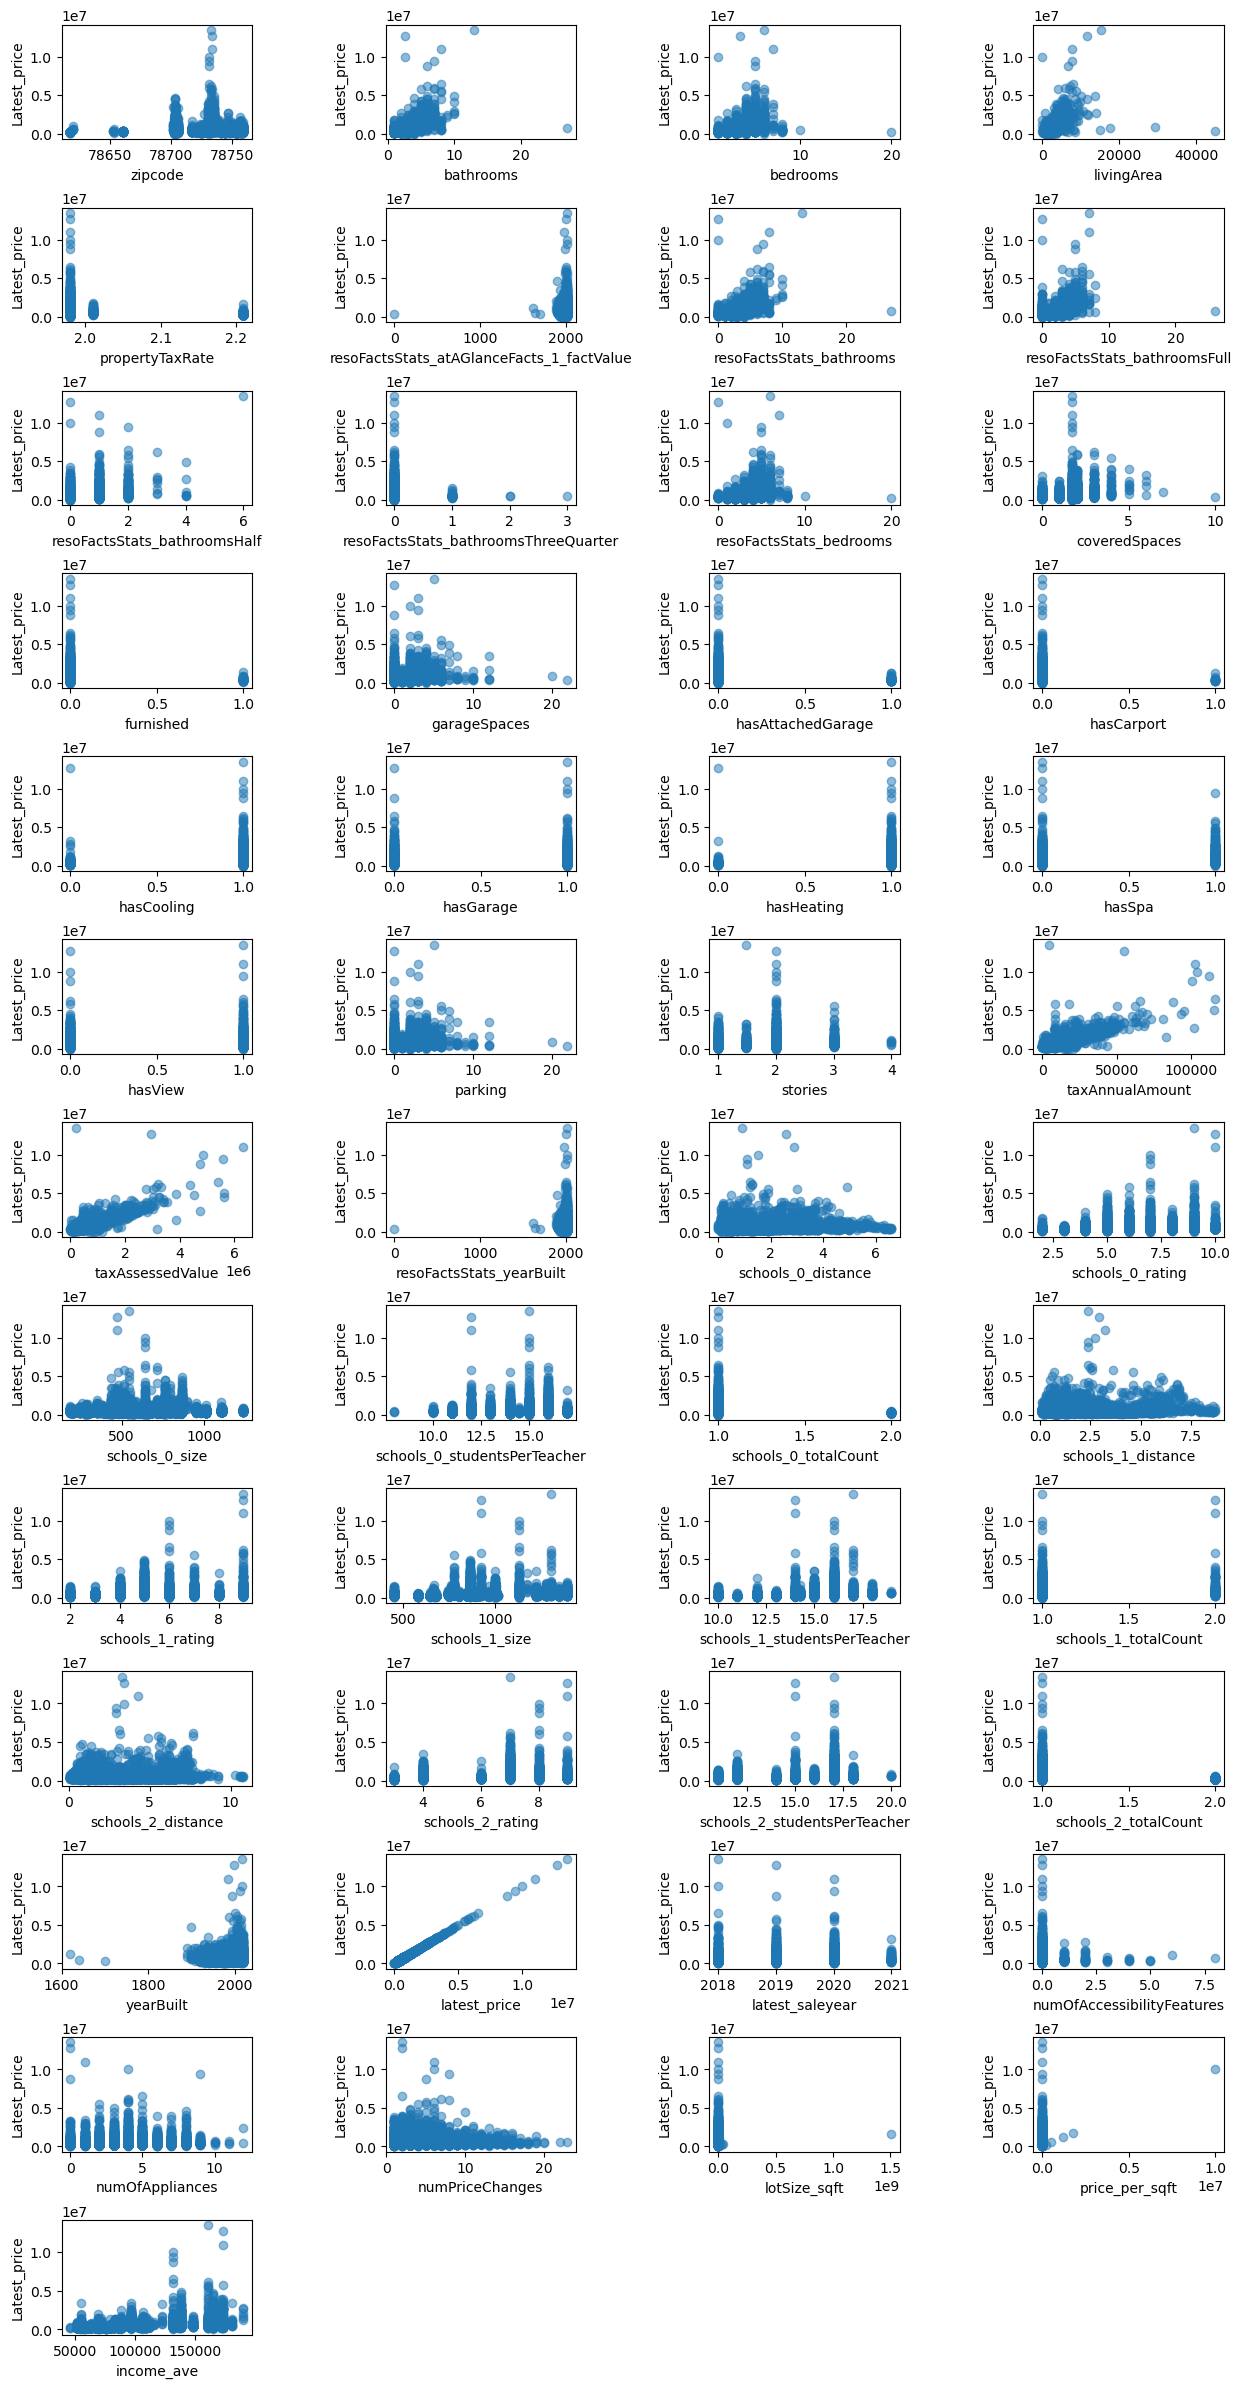

In [22]:
scatterplots(features, ncol=4, figsize=(15, 30))

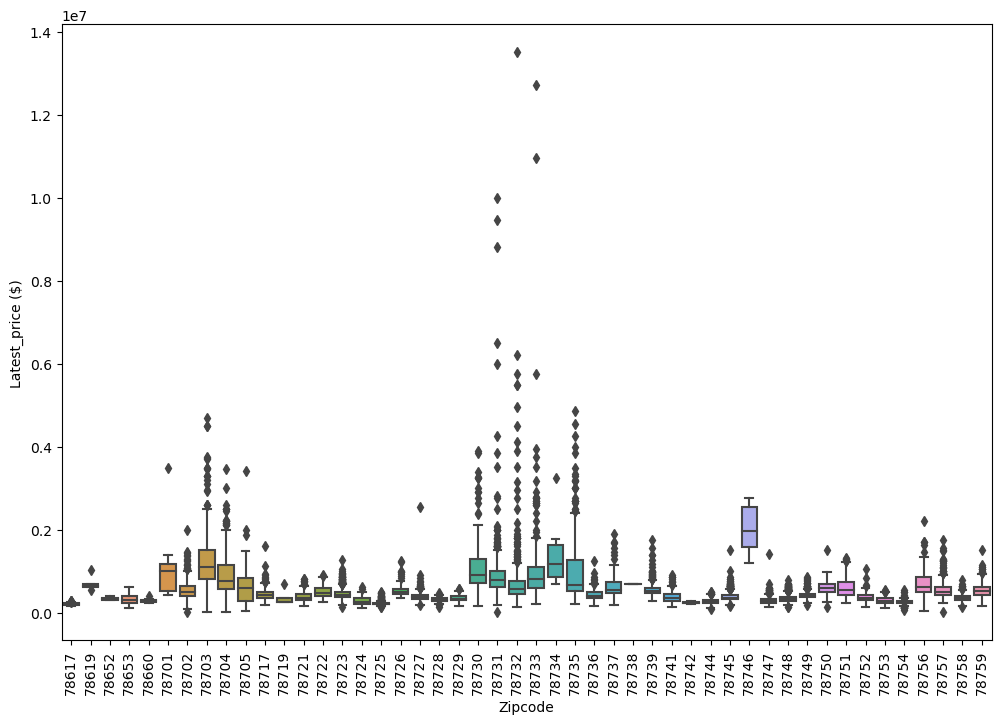

In [23]:
plt.subplots(figsize=(12, 8))
sns.boxplot(x='zipcode', y='latest_price', data=zip_house_price_df)
plt.xticks(rotation='vertical')
plt.ylabel('Latest_price ($)')
plt.xlabel('Zipcode');

In [24]:
zip_house_price_df[~zip_house_price_df['zipcode'].isin([78731, 78732, 78733])]

,zipcode,price_per_sqft,latest_price
29,78734,latest_price,1275000.0
30,78734,latest_price,1595000.0
32,78734,latest_price,1775000.0
43,78734,latest_price,1090000.0
45,78734,latest_price,925000.0
...,...,...,...
14728,78749,latest_price,292500.0
14729,78749,latest_price,425000.0
14730,78749,latest_price,424999.0
14731,78749,latest_price,316000.0


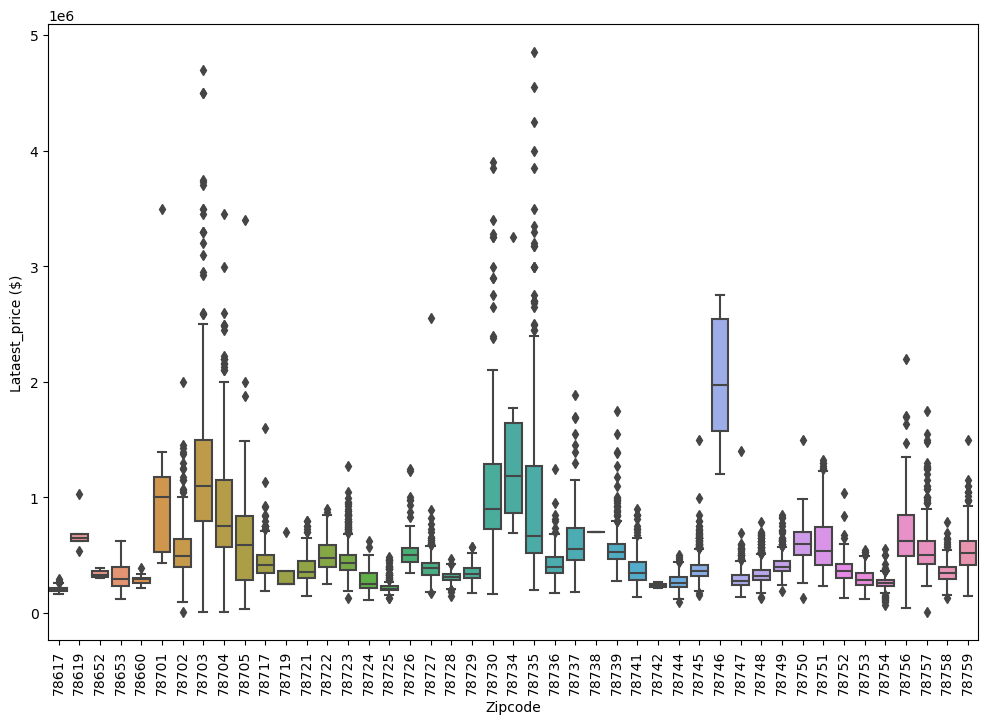

In [25]:
# Analyze housing prices by excluding zipcodes with several outliers
plt.subplots(figsize=(12, 8))
sns.boxplot(x='zipcode', y='latest_price', data=zip_house_price_df[~zip_house_price_df['zipcode'].isin([78731, 78732, 78733])])
plt.xticks(rotation='vertical')
plt.ylabel('Lataest_price ($)')
plt.xlabel('Zipcode');

In [26]:
# Calculate the correlation matrix
#correlation_matrix = df.corr()

# Set up the matplotlib figure
#plt.figure(figsize=(15, 10))

# Draw the heatmap
#sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Show the plot
#plt.title('Correlation Matrix')
#plt.show()

### 3. IDENTIFYING AND CREATING FEATURES

In [27]:
df.head()

,zipcode,bathrooms,bedrooms,livingArea,propertyTaxRate,resoFactsStats_atAGlanceFacts_1_factValue,resoFactsStats_bathrooms,resoFactsStats_bathroomsFull,resoFactsStats_bathroomsHalf,resoFactsStats_bathroomsThreeQuarter,...,schools_2_totalCount,yearBuilt,latest_price,latest_saleyear,numOfAccessibilityFeatures,numOfAppliances,numPriceChanges,lotSize_sqft,price_per_sqft,income_ave
0,78732,5.0,4.0,4060.0,1.98,2007.0,5.0,4.0,1.0,0.0,...,1.0,2007.0,715000.0,2018.0,0.0,3.0,1.0,15681.6,176.108374,160552.96
1,78732,5.0,5.0,4558.0,1.98,2007.0,5.0,5.0,0.0,0.0,...,1.0,2007.0,1025000.0,2020.0,0.0,3.0,2.0,28749.6,224.879333,160552.96
2,78732,4.0,4.0,4749.0,1.98,2011.0,4.0,3.0,1.0,0.0,...,1.0,2011.0,825000.0,2018.0,0.0,1.0,4.0,21344.4,173.720783,160552.96
3,78732,4.0,4.0,4867.0,1.98,2009.0,4.0,4.0,0.0,0.0,...,1.0,2009.0,849000.0,2019.0,0.0,4.0,7.0,20908.8,174.440107,160552.96
4,78732,4.0,5.0,3485.0,1.98,2009.0,4.0,3.0,1.0,0.0,...,1.0,2009.0,625000.0,2019.0,0.0,4.0,4.0,7797.0,179.340029,160552.96


In [28]:
df.set_index('zipcode', inplace=True)

In [29]:
df.head()

,bathrooms,bedrooms,livingArea,propertyTaxRate,resoFactsStats_atAGlanceFacts_1_factValue,resoFactsStats_bathrooms,resoFactsStats_bathroomsFull,resoFactsStats_bathroomsHalf,resoFactsStats_bathroomsThreeQuarter,resoFactsStats_bedrooms,...,schools_2_totalCount,yearBuilt,latest_price,latest_saleyear,numOfAccessibilityFeatures,numOfAppliances,numPriceChanges,lotSize_sqft,price_per_sqft,income_ave
zipcode,,,,,,,,,,,,,,,,,,,,,
78732,5.0,4.0,4060.0,1.98,2007.0,5.0,4.0,1.0,0.0,4.0,...,1.0,2007.0,715000.0,2018.0,0.0,3.0,1.0,15681.6,176.108374,160552.96
78732,5.0,5.0,4558.0,1.98,2007.0,5.0,5.0,0.0,0.0,5.0,...,1.0,2007.0,1025000.0,2020.0,0.0,3.0,2.0,28749.6,224.879333,160552.96
78732,4.0,4.0,4749.0,1.98,2011.0,4.0,3.0,1.0,0.0,4.0,...,1.0,2011.0,825000.0,2018.0,0.0,1.0,4.0,21344.4,173.720783,160552.96
78732,4.0,4.0,4867.0,1.98,2009.0,4.0,4.0,0.0,0.0,4.0,...,1.0,2009.0,849000.0,2019.0,0.0,4.0,7.0,20908.8,174.440107,160552.96
78732,4.0,5.0,3485.0,1.98,2009.0,4.0,3.0,1.0,0.0,5.0,...,1.0,2009.0,625000.0,2019.0,0.0,4.0,4.0,7797.0,179.340029,160552.96


In [30]:
price_df = df['latest_price']
price_df.head()

zipcode
78732     715000.0
78732    1025000.0
78732     825000.0
78732     849000.0
78732     625000.0
Name: latest_price, dtype: float64

In [31]:
df = df.drop(columns=['latest_price'])

In [32]:
df.shape

(14733, 47)

Text(0, 0.5, 'Variance Explained')

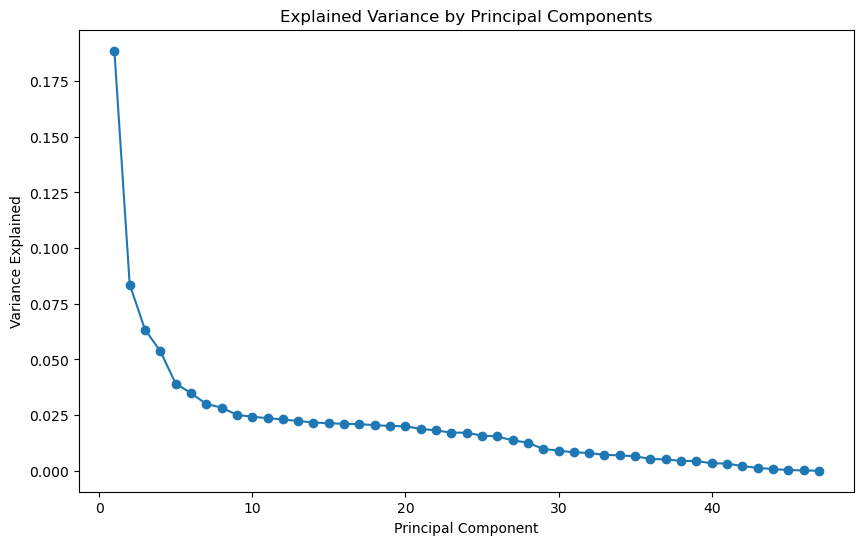

In [33]:
# Standardize the Data andRun PCA 
# to identify essential features to be considered in the model construction
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the Data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Apply PCA
pca = PCA()
pca_fitted = pca.fit(scaled_data)

# Explained Variance
explained_variance = pca_fitted.explained_variance_ratio_

# Plotting the explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')

In [34]:
scaled_data.shape

(14733, 47)

In [35]:
pca_fitted

PCA()

In [37]:
features = range(pca_fitted.n_components_)

Text(0, 0.5, 'Variance Explained')

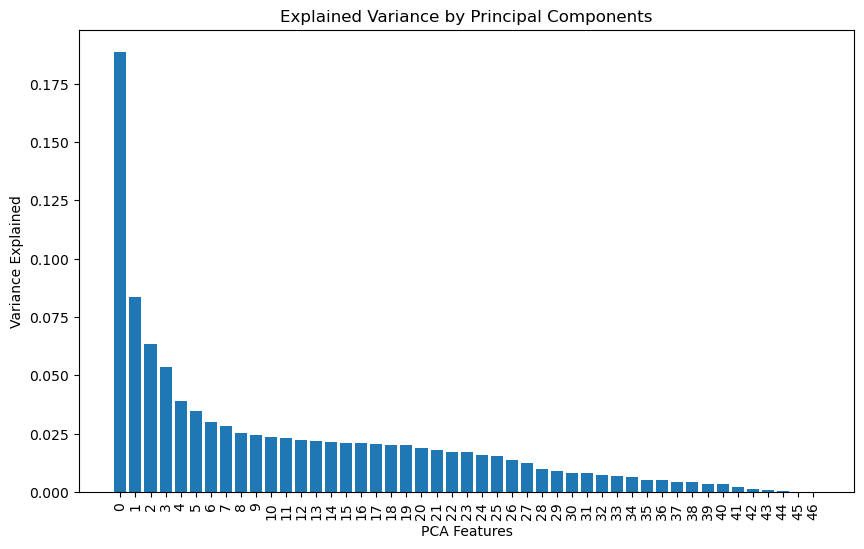

In [38]:
# BarPlot
plt.figure(figsize=(10, 6))
plt.bar(features, explained_variance)
plt.xticks(features, rotation = 90)
plt.title('Explained Variance by Principal Components')
plt.xlabel('PCA Features')
plt.ylabel('Variance Explained')

In [39]:
# Select components based on explained variance threshold
threshold = 0.8  # Select enough components to explain 80% of variance
cumulative_variance = np.cumsum(explained_variance)
n_components = np.argmax(cumulative_variance >= threshold) + 1

print(f"Number of components selected: {n_components}")

Number of components selected: 21


In [40]:
# Fit PCA with selected number of components
pca_comp = PCA(n_components=n_components)
pca_result = pca_comp.fit(scaled_data)

# Examine Loadings
loadings = pd.DataFrame(pca_comp.components_.T, columns=[f'PC_{i+1}' for i in range(n_components)], index=df.columns)

# Display loadings for the selected components
print("\nFeature Loadings for Selected Components:")
#print(loadings)
loadings.head()


Feature Loadings for Selected Components:


,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,...,PC_12,PC_13,PC_14,PC_15,PC_16,PC_17,PC_18,PC_19,PC_20,PC_21
bathrooms,-0.269240,-0.175457,-0.043707,0.182538,-0.065388,0.051441,0.017102,0.058904,-0.077052,0.077967,...,-0.068291,-0.008319,0.038127,0.009330,0.001025,-0.005180,0.073655,0.041951,-0.000092,0.002773
bedrooms,-0.216737,-0.117690,-0.029835,0.149278,-0.127153,0.028651,-0.432426,-0.107675,-0.010040,-0.097490,...,0.076325,0.042527,-0.102370,-0.048005,0.060081,0.057414,-0.025196,-0.089565,0.068305,0.165646
livingArea,-0.262527,-0.074697,-0.007040,0.180037,0.029294,0.001109,-0.074386,-0.016838,0.019837,-0.017305,...,0.006631,0.005095,0.001188,0.013751,-0.012917,-0.023171,-0.017389,0.004964,-0.029401,-0.069197
propertyTaxRate,-0.039158,-0.002942,-0.038939,-0.096090,-0.130450,0.102066,-0.093458,-0.372119,-0.071079,-0.063698,...,0.054820,0.026864,0.650472,0.011439,-0.198486,0.059882,0.008894,-0.079369,0.136011,-0.352470
resoFactsStats_atAGlanceFacts_1_factValue,-0.133158,-0.240786,-0.249454,-0.297919,-0.035471,0.065172,0.188761,0.037679,0.103144,-0.170171,...,0.082823,0.022125,-0.095903,-0.017784,0.091610,0.119395,-0.102024,-0.002162,0.000363,-0.055131


In [41]:
type(pca_result)

sklearn.decomposition._pca.PCA

In [42]:
loadings.shape

(47, 21)

In [43]:
pca_columns = loadings.columns
pca_columns

Index(['PC_1', 'PC_2', 'PC_3', 'PC_4', 'PC_5', 'PC_6', 'PC_7', 'PC_8', 'PC_9',
       'PC_10', 'PC_11', 'PC_12', 'PC_13', 'PC_14', 'PC_15', 'PC_16', 'PC_17',
       'PC_18', 'PC_19', 'PC_20', 'PC_21'],
      dtype='object')

In [44]:
type(pca_fitted)

sklearn.decomposition._pca.PCA

In [45]:
pca_result_x = pca_fitted.transform(scaled_data)
pca_result_x.shape

(14733, 47)

In [47]:
type(pca_result_x)

numpy.ndarray

In [52]:
pca_result_x_df = pd.DataFrame(pca_result_x)
pca_result_df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
0,-5.379758,0.648896,-2.630009,1.324542,-0.516196,0.427561,0.546939,-0.587342,0.040090,0.440668,...,-0.194648,-0.069778,0.166141,0.196044,-0.180053,-0.142683,0.030644,-0.033695,-0.001243,-2.204129e-16
1,-7.208337,-0.966243,1.095670,0.718015,-0.079973,0.692868,-1.213629,-0.774073,1.121826,-0.526366,...,-0.117768,-0.175596,0.026700,0.176197,-0.261163,-0.481704,0.009928,-0.006876,-0.009131,-5.235100e-16
2,-6.081084,-0.414983,1.218450,0.127751,0.498261,0.771758,1.033676,-0.716406,1.232510,-0.334900,...,-0.053244,0.027089,0.151422,0.260919,-0.176623,-0.212749,-0.086285,-0.001135,0.013249,2.577624e-16


In [53]:
pca_result_x.shape

(14733, 47)

In [54]:
# Save the DataFrame to a CSV file
pca_result_x_df.to_csv('../03_processed_data/austin_housePrice_and_income_data_af_EDA_PCA.csv', index=False)

print("DataFrame saved to 'austin_housePrice_and_income_data_af_EDA_PCA.csv'.")

DataFrame saved to 'austin_housePrice_and_income_data_af_EDA_PCA.csv'.


In [ ]:
#df_columns = df.columns
df_columns

In [ ]:
#df_index = df.index
df_index

In [ ]:
#pca_df2 = pd.DataFrame(pca_fit_x, index = df_index)
#pca_df2.head(1)

In [ ]:
#pca_df.columns = df_columns
#pca_df.head()

In [ ]:
#pca_df = pd.concat([pca_df, ], axis=1)
#pca_df.head()